<a href="https://colab.research.google.com/github/matheusglima/Python_Investing/blob/master/Correla%C3%A7ao_IBOV_e_S%26P_500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns
sns.set()

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=932da41a9794e1163c0c5423592aeacb49fb90149cbf4c832607f39146446f2d
  Stored in directory: /tmp/pip-ephem-wheel-cache-29u711po/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


**Obtendo dados do mercado**

In [15]:
tickers = ['^BVSP', '^GSPC']
dados_yahoo = web.get_data_yahoo(tickers, period='5y')['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [19]:
dados_yahoo = dados_yahoo.dropna()
dados_yahoo

,^BVSP,^GSPC
Date,,
2015-06-01,53031.000000,2111.729980
2015-06-02,54236.000000,2109.600098
2015-06-03,53523.000000,2114.070068
2015-06-05,52973.000000,2092.830078
2015-06-08,52810.000000,2079.280029
...,...,...
2020-05-26,85469.000000,2991.770020
2020-05-27,87946.000000,3036.129883
2020-05-28,86949.000000,3029.729980


In [20]:
dados_yahoo.columns = ['IBOV', 'S&P 500']
dados_yahoo

,IBOV,S&P 500
Date,,
2015-06-01,53031.000000,2111.729980
2015-06-02,54236.000000,2109.600098
2015-06-03,53523.000000,2114.070068
2015-06-05,52973.000000,2092.830078
2015-06-08,52810.000000,2079.280029
...,...,...
2020-05-26,85469.000000,2991.770020
2020-05-27,87946.000000,3036.129883
2020-05-28,86949.000000,3029.729980


In [29]:
dados_yahoo['ibov_normalizado'] = (dados_yahoo['IBOV'] / dados_yahoo['IBOV'].iloc[0])
dados_yahoo['S&P_normalizado'] = (dados_yahoo['S&P 500'] / dados_yahoo['S&P 500'].iloc[0])
dados_yahoo

,IBOV,S&P 500,ibov_normalizado,S&P_normalizado
Date,,,,
2015-06-01,53031.000000,2111.729980,1.000000,1.000000
2015-06-02,54236.000000,2109.600098,1.022723,0.998991
2015-06-03,53523.000000,2114.070068,1.009278,1.001108
2015-06-05,52973.000000,2092.830078,0.998906,0.991050
2015-06-08,52810.000000,2079.280029,0.995833,0.984633
...,...,...,...,...
2020-05-26,85469.000000,2991.770020,1.611680,1.416739
2020-05-27,87946.000000,3036.129883,1.658388,1.437745
2020-05-28,86949.000000,3029.729980,1.639588,1.434715


**Resultados**

0.5688709813437569

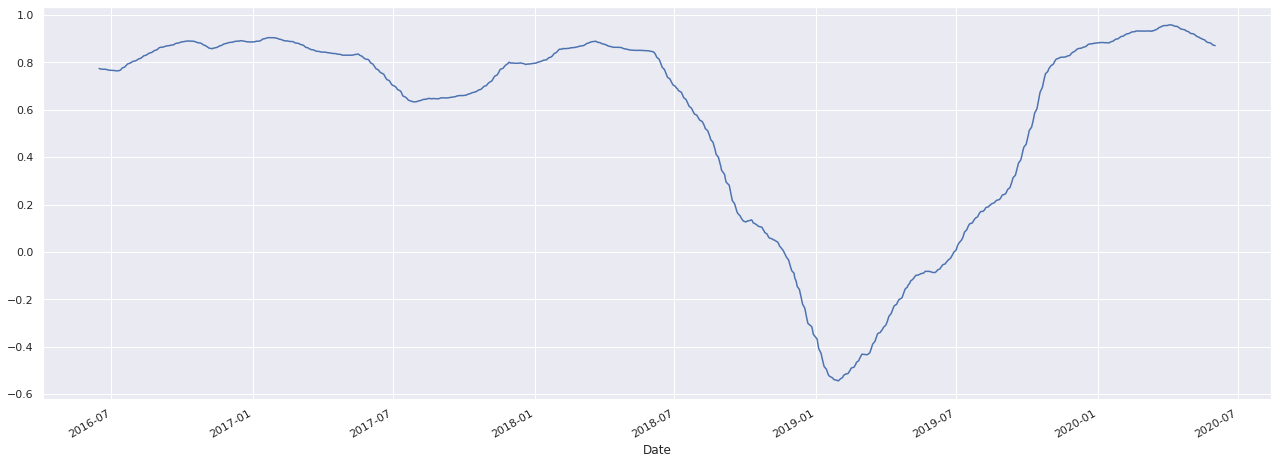

In [31]:
dados_yahoo['ibov_normalizado'].rolling(252).corr(dados_yahoo['S&P_normalizado']).plot(figsize=(22, 8))
dados_yahoo['ibov_normalizado'].rolling(252).corr(dados_yahoo['S&P_normalizado']).mean()

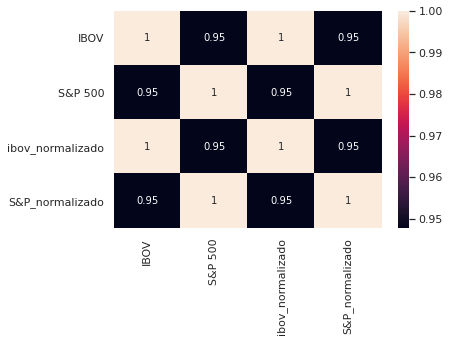

In [38]:
sns.heatmap(dados_yahoo.corr(), annot=True)